In [1]:
!pip install boto3

In [0]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import boto3

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
imgPath = '/content/drive/My Drive/Colab Notebooks/Images/thor.jpg'

Create API Config

In [0]:
!mkdir -p ~/.aws &&\
  cp -r /content/drive/My\ Drive/Colab\ Notebooks/credentials ~/.aws/credentials

In [0]:
os.environ['AWS_PROFILE'] = "default"
os.environ['AWS_DEFAULT_REGION'] = "us-east-1"

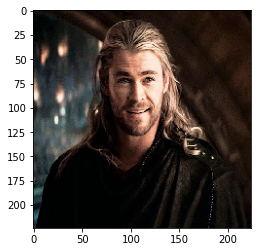

In [56]:
img = image.load_img(imgPath, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [50]:
#Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#PDX-License-Identifier: MIT-0 (For details, see https://github.com/awsdocs/amazon-rekognition-developer-guide/blob/master/LICENSE-SAMPLECODE.)

def detect_labels_local_file(photo):


    client=boto3.client('rekognition', region_name="us-east-1", )
   
    with open(photo, 'rb') as image:
        response = client.detect_labels(Image={'Bytes': image.read()})
        
    print('Detected labels in ' + photo)    
    for label in response['Labels']:
        print (label['Name'] + ' : ' + str(label['Confidence']))

    return len(response['Labels'])

def main():
    photo=imgPath

    label_count=detect_labels_local_file(photo)
    print("Labels detected: " + str(label_count))


if __name__ == "__main__":
    main()

Detected labels in /content/drive/My Drive/Colab Notebooks/Images/thor.jpg
Human : 98.67313385009766
Face : 98.67313385009766
Person : 98.67313385009766
Clothing : 90.38458251953125
Apparel : 90.38458251953125
Man : 88.90574645996094
Performer : 84.35128021240234
Coat : 74.78121948242188
Lighting : 73.13510131835938
Jacket : 71.84659576416016
Portrait : 70.05985260009766
Photography : 70.05985260009766
Photo : 70.05985260009766
Labels detected: 13
